In [ ]:
#hide
import sys
sys.path.append('..')
import pandas as pd
%load_ext autoreload
%autoreload 2

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Fastseq

> A way to use fastai with sequence data

## Installing

Please install [fastai2](https://dev.fast.ai/#Installing) according to the instructions.

Then install Fastseq by:
```
pip install -e .
```

## How to use

In [ ]:
from fastai2.basics import *
from fastseq.all import *
from fastseq.nbeats.model import *
from fastseq.nbeats.learner import *
horizon, lookback = 7, 35    

Getting the data fastai style:

In [ ]:
path = untar_data(URLs.m4_daily)
data = TSDataLoaders.from_folder(path, horizon = horizon, lookback = lookback, nrows = 300, step=3, max_std=1.5)

torch.Size([1, 1020])
Train:70707; Valid: 1200; Test 300


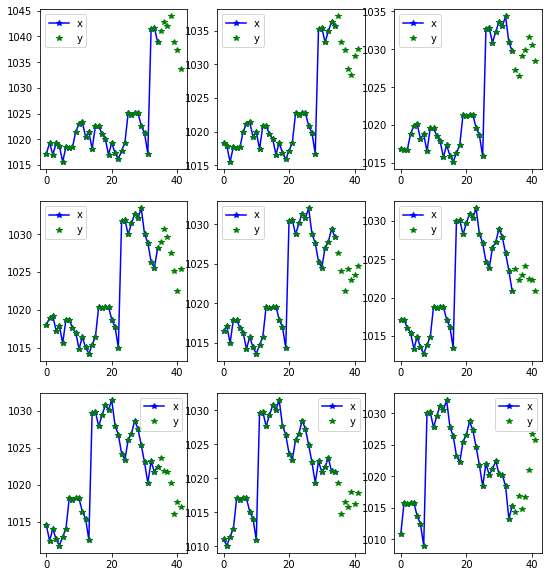

In [ ]:
data.show_batch()

In [ ]:
from fastseq.nbeats.callbacks import *
learn = nbeats_learner(data, cbs=ClipLoss(20), season =lookback+horizon)   

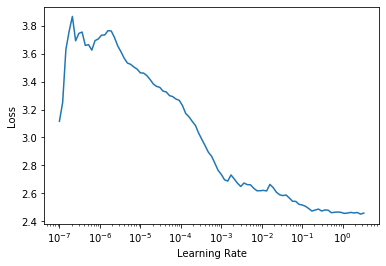

In [ ]:
from fastai2.callback.all import *
learn.lr_find()

epoch,train_loss,valid_loss,mae,smape,theta,b_loss,f_loss,time
0,1.540548,2.303195,2834467.500000,0.772452,1.759676,nan,nan,01:22
1,1.536659,2.219578,2834467.500000,0.768887,1.594365,nan,nan,01:22
2,1.409645,2.161446,2834467.500000,0.712815,1.681730,nan,nan,01:23
3,1.415572,2.195107,2834467.500000,0.724577,1.614143,nan,nan,01:24
4,1.300322,2.121976,2834467.500000,0.677533,1.609086,nan,nan,01:22


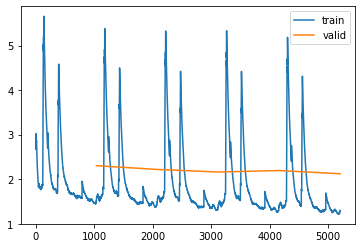

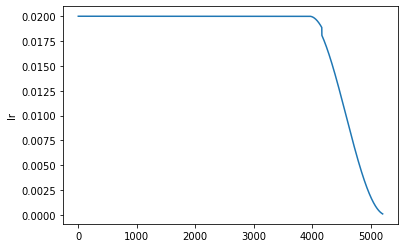

In [ ]:
learn.fit_flat_cos(5, 2e-2)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

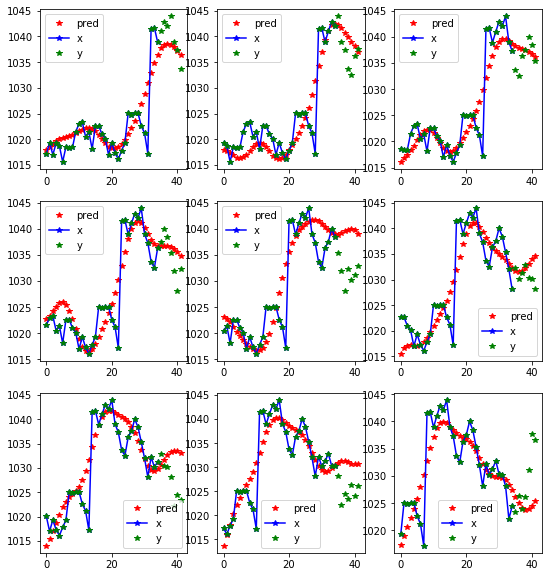

In [ ]:
learn.show_results(0)

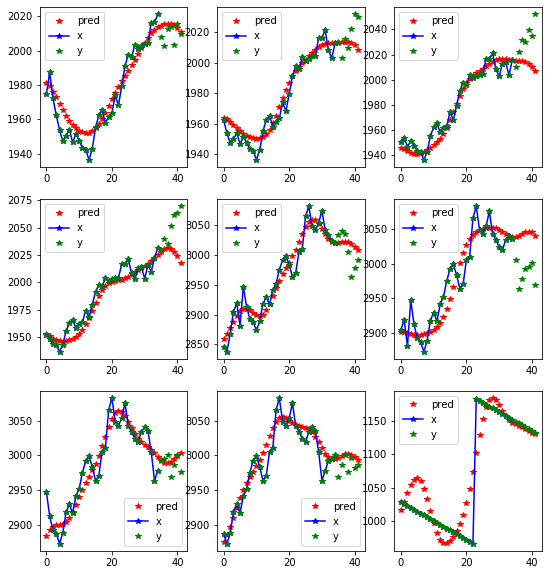

In [ ]:
learn.show_results(1)

In [ ]:
learn.fit_flat_cos(5,5e-4)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

## Interperation

In [ ]:
learn.n_beats_attention.means()

,trend0_0,trend0_1,seasonality1_0,seasonality1_1,seasonality1_2,seasonality1_3
theta_0_mean,1.0484735,0.5712331,0.7695762,-0.13409285,-0.165535,0.5304334
theta_0_std,0.53147,0.5104649,0.89892924,0.12476344,0.11738308,1.0524368
theta_1_mean,0.0,-0.008486307,0.33995187,-0.123186365,-0.072090976,0.2616474
theta_1_std,0.0,0.008260585,0.25519606,0.20760116,0.3698771,0.18846405
theta_2_mean,-0.0034576228,-0.0004631914,0.09690633,-0.085941315,-0.055885807,-0.046996526
theta_2_std,0.0018157117,0.0012395354,0.120248154,0.15570128,0.07383171,0.09366264
theta_3_mean,0.044545975,0.0,NaN,-0.0034272978,0.09713822,0.18888618
theta_3_std,0.030647082,0.0,NaN,0.03154439,0.15776587,0.62231266
theta_4_mean,0.2584329,0.049222477,NaN,NaN,-0.005607492,-0.03192711
theta_4_std,0.44719952,0.06712501,NaN,NaN,0.059638757,0.30349037


In [ ]:
# hide
from fastai2.interpret import *
from fastseq.nbeats.interpret import *

In [ ]:
# hide
# interp = NBeatsInterpretation.from_learner(learn)

In [ ]:
# hide
# interp.plot_top_losses(3, combine_stack=True)